### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set and on for every next 7 days)
### Total infected cases, total fatalities, total recovered

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

Start importing files in folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', '03-08-2020.csv', '03-09-2020.csv', '03-10-2020.csv', '03-11-2020.csv', '03-12-2020.csv', '03-13-2020.csv', '03-14-2020.csv',

In [2]:
today_is=files[-2].split('.')[0]
today_is

'11-25-2020'

### Number of covid-19 outbreak days 

In [3]:
from covid import *
len(x_dat)

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


309

In [4]:
# StartML.searchByValue(data[289], try_keys=['Country_Region', 'Country/Region'], value='US')['Confirmed'].values, len(data)

### Total CONFIRMED cases in the World changed by week

[(1, 5578), (2, 23892), (3, 44803), (4, 75138), (5, 80415), (6, 92844), (7, 118582), (8, 197168), (9, 418031), (10, 857563), (11, 1426235), (12, 1976301), (13, 2549324), (14, 3116487), (15, 3662810), (16, 4262324), (17, 4897977), (18, 5589913), (19, 6386378), (20, 7242728), (21, 8174092), (22, 9264322), (23, 10476358), (24, 11830330), (25, 13325244), (26, 14948018), (27, 16691857), (28, 18542212), (29, 20345623), (30, 22140543), (31, 23892718), (32, 25753520), (33, 27575358), (34, 29563938), (35, 31609052), (36, 33651901), (37, 35816491), (38, 38141346), (39, 40805135), (40, 43991113), (41, 47468088), (42, 51494283), (43, 55638883), (44, 59759494), (45, 60392439)]


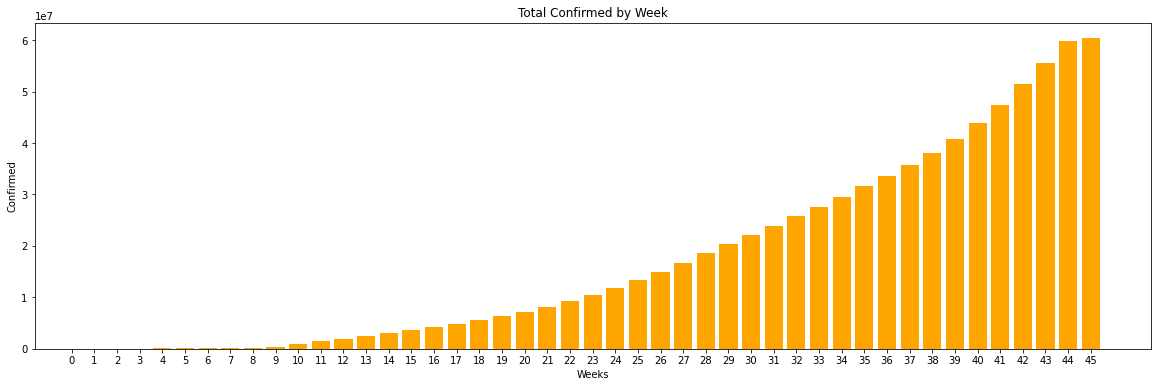

In [5]:
x_weeks = [week for week, value in confirmedByWeek]
y_cases = [value for week, value in confirmedByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed by Week")
plt.savefig('output/week_totalconfirmed.jpg')
print(confirmedByWeek)

Increasing by Week: 
 [5578, 18314, 20911, 30335, 5277, 12429, 25738, 78586, 220863, 439532, 568672, 550066, 573023, 567163, 546323, 599514, 635653, 691936, 796465, 856350, 931364, 1090230, 1212036, 1353972, 1494914, 1622774, 1743839, 1850355, 1803411, 1794920, 1752175, 1860802, 1821838, 1988580, 2045114, 2042849, 2164590, 2324855, 2663789, 3185978, 3476975, 4026195, 4144600, 4120611, 632945]

Week: 5 with lowest confirmed cases: 5277

Week: 43 with highest confirmed cases: 4144600

Average confirmed by Week until now:  1342054.2


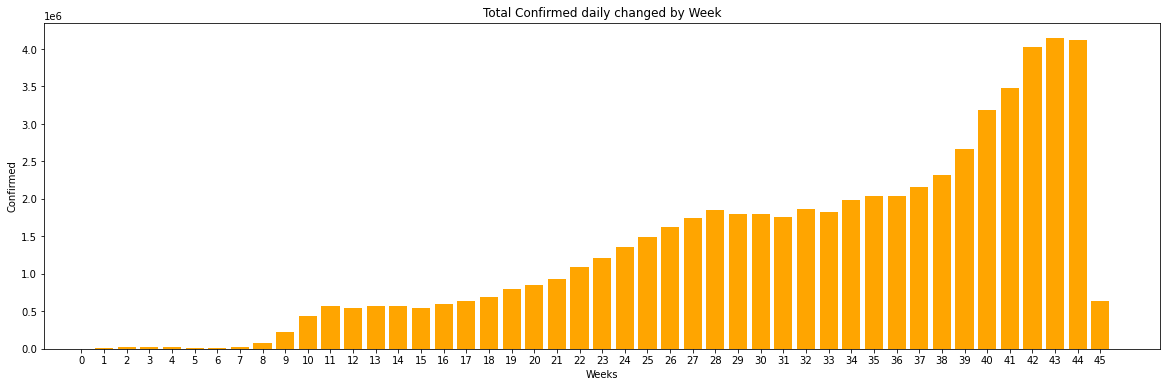

In [6]:
y_cases = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
print("Increasing by Week: \n", y_cases)
print("\nWeek:", np.argmin(y_cases)+1, "with lowest confirmed cases:", y_cases[np.argmin(y_cases)])
print("\nWeek:", np.argmax(y_cases)+1, "with highest confirmed cases:", y_cases[np.argmax(y_cases)])
print("\nAverage confirmed by Week until now: ", np.mean(y_cases))
plt.title("Total Confirmed daily changed by Week")
plt.savefig('output/week_totalconfirmed_weekly.jpg')
# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total FATALITIES cases in the World changed by week

[(1, 131), (2, 492), (3, 1113), (4, 2007), (5, 2708), (6, 3160), (7, 4262), (8, 7905), (9, 18615), (10, 42109), (11, 81870), (12, 125992), (13, 176584), (14, 217154), (15, 257239), (16, 291964), (17, 323286), (18, 350454), (19, 380385), (20, 411438), (21, 443689), (22, 477587), (23, 511256), (24, 544173), (25, 578654), (26, 616465), (27, 659680), (28, 700779), (29, 742633), (30, 780940), (31, 819419), (32, 857064), (33, 897470), (34, 934977), (35, 970978), (36, 1008073), (37, 1050080), (38, 1086337), (39, 1124965), (40, 1167127), (41, 1214414), (42, 1274037), (43, 1338150), (44, 1409252), (45, 1421308)]


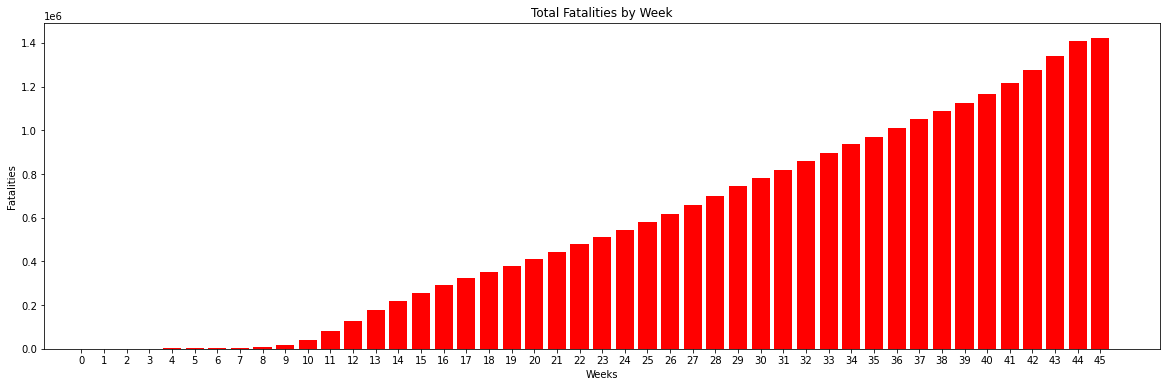

In [7]:
x_weeks = [week for week, value in deathsByWeek]
y_cases = [value for week, value in deathsByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities by Week")
plt.savefig('output/week_totalfatalities.jpg')
print(deathsByWeek)

Increasing by Week: 
 [131, 361, 621, 894, 701, 452, 1102, 3643, 10710, 23494, 39761, 44122, 50592, 40570, 40085, 34725, 31322, 27168, 29931, 31053, 32251, 33898, 33669, 32917, 34481, 37811, 43215, 41099, 41854, 38307, 38479, 37645, 40406, 37507, 36001, 37095, 42007, 36257, 38628, 42162, 47287, 59623, 64113, 71102, 12056]

Week: 1 with lowest fatalities cases:  131

Week: 44 with highest fatalities cases:  71102

Average fatalities by Week:  31584.62222222222


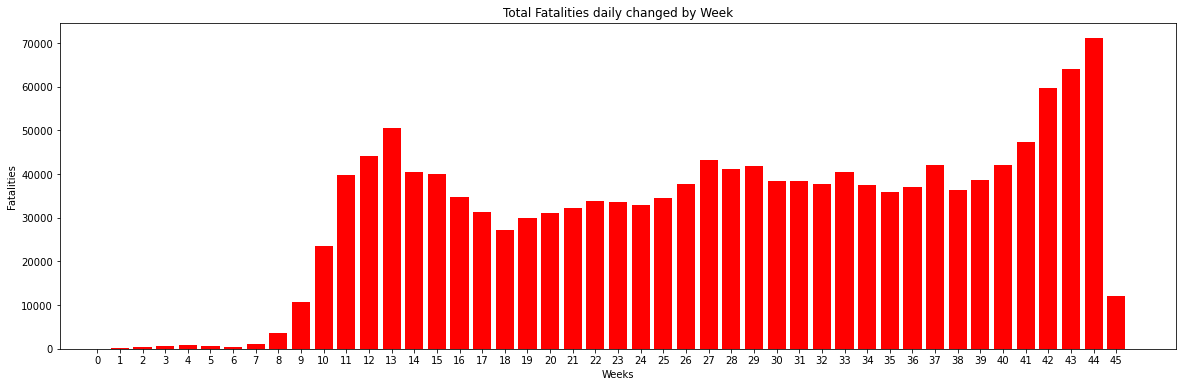

In [8]:
y_cases = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
print("Increasing by Week: \n", y_cases)
print("\nWeek:", np.argmin(y_cases)+1, "with lowest fatalities cases: ", y_cases[np.argmin(y_cases)])
print("\nWeek:", np.argmax(y_cases)+1, "with highest fatalities cases: ", y_cases[np.argmax(y_cases)])
print("\nAverage fatalities by Week: ", np.mean(y_cases))
plt.title("Total Fatalities daily changed by Week")
plt.savefig('output/week_totalfatalities_weekly.jpg')
# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total RECOVERED cases in the World changed by week

[(1, 107), (2, 852), (3, 4683), (4, 14352), (5, 27905), (6, 48229), (7, 64404), (8, 80840), (9, 107699), (10, 178028), (11, 300054), (12, 474261), (13, 679819), (14, 928658), (15, 1198832), (16, 1493414), (17, 1838995), (18, 2286956), (19, 2729527), (20, 3375673), (21, 3955169), (22, 4630391), (23, 5353272), (24, 6447656), (25, 7399474), (26, 8467147), (27, 9711187), (28, 11134735), (29, 12585663), (30, 14116672), (31, 15570193), (32, 17075392), (33, 18526387), (34, 20081977), (35, 21718209), (36, 23392396), (37, 24981297), (38, 26466504), (39, 27908333), (40, 29789567), (41, 31609242), (42, 33546421), (43, 35784056), (44, 38267861), (45, 38704717)]


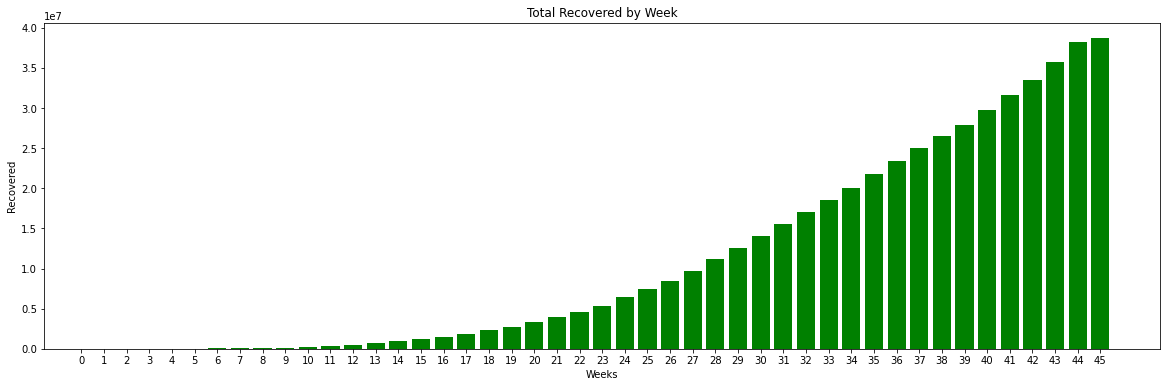

In [9]:
x_weeks = [week for week, value in recoveredByWeek]
y_cases = [value for week, value in recoveredByWeek]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered by Week")
plt.savefig('output/week_totalrecovered.jpg')
print(recoveredByWeek)

Increasing by Week: 
 [107, 745, 3831, 9669, 13553, 20324, 16175, 16436, 26859, 70329, 122026, 174207, 205558, 248839, 270174, 294582, 345581, 447961, 442571, 646146, 579496, 675222, 722881, 1094384, 951818, 1067673, 1244040, 1423548, 1450928, 1531009, 1453521, 1505199, 1450995, 1555590, 1636232, 1674187, 1588901, 1485207, 1441829, 1881234, 1819675, 1937179, 2237635, 2483805, 436856]

Week: 1 with lowest recovered cases: 107

Week: 44 with highest recovered cases: 2483805

Average recovered by Week:  860104.8222222222


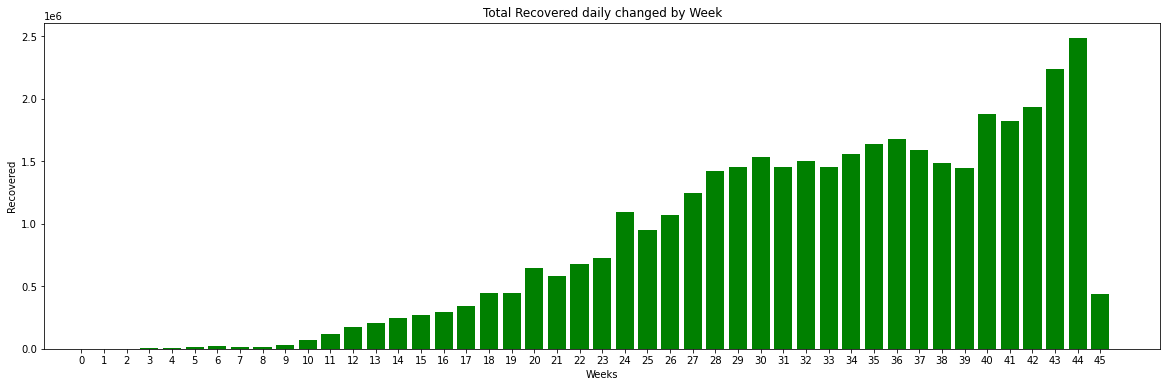

In [10]:
y_cases = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
print("Increasing by Week: \n", y_cases)

print("\nWeek:", np.argmin(y_cases)+1, "with lowest recovered cases:", y_cases[np.argmin(y_cases)])
print("\nWeek:", np.argmax(y_cases)+1, "with highest recovered cases:", y_cases[np.argmax(y_cases)])
print("\nAverage recovered by Week: ", np.mean(y_cases))
plt.title("Total Recovered daily changed by Week")
plt.savefig('output/week_totalrecovered_weekly.jpg')
# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1